In [1]:
'''
Deutsch - Jozsa Benchmark Program - Qsim
'''
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, BasicAer
from qiskit import *


import numpy as np
import matplotlib.pyplot as plt 
import sys, time

#import metrics
#import execute as ex 

# Noise parameters
options = { } #if Noise is None

options_noisy = { #if Noise is not None
    'plot': False,
    "thermal_factor": 0.0,
    'show_partition': True,
    "decoherence_factor": 0.9,
    "depolarization_factor": 0.9,
    "bell_depolarization_factor": 0.9,
    "decay_factor": 0.9,
    "rotation_error": {'rx':[1.0, 0.0], 'ry':[1.0, 0.0], 'rz':[1.0, 0.0]},
    "tsp_model_error": [1.0, 0.0],
}

#Benchmark Name
benchmark_name = "Duestch - Jozsa Qsim"

np.random.seed(0)

# This sets the seed of the random number generator to the specified value, in this case, 0. 
# Setting the seed to a specific value ensures that the sequence of random numbers 
# generated is the same every time the program is run.

verbose = False

# When verbose is set to False, it usually means that the program will run without providing
# detailed or extra information, resulting in a more concise and less informative output.

# saved circuits for display
QC_ = None
C_ORACLE_ = None
B_ORACLE_ = None

In [2]:
############# Circuit Definition ################

# Define constant_oracle function
def constant_oracle(input_size, num_qubits):
    qc = QuantumCircuit(num_qubits, name=f"Uf")

    output = np.random.randint(2)
    if output == 1:
        qc.x(input_size)

    global C_ORACLE_
    if C_ORACLE_ is None or num_qubits <= 6:
        if num_qubits < 9:
            C_ORACLE_ = qc

    return qc

In [3]:
# Define balanced_oracle function
def balanced_oracle(input_size, num_qubits):
    qc = QuantumCircuit(num_qubits, name=f"Uf")

    b_str = "10101010101010101010"  # permit input_string up to 20 chars
    for qubit in range(input_size):
        if b_str[qubit] == '1':
            qc.x(qubit)

    qc.barrier()

    for qubit in range(input_size):
        qc.cx(qubit, input_size)

    qc.barrier()

    for qubit in range(input_size):
        if b_str[qubit] == '1':
            qc.x(qubit)

    global B_ORACLE_
    if B_ORACLE_ is None or num_qubits <= 6:
        if num_qubits < 9:
            B_ORACLE_ = qc

    return qc

In [4]:
# Define DeutschJozsa function
def DeutschJozsa(num_qubits, type):
    input_size = num_qubits - 1

    qr = QuantumRegister(num_qubits)
    cr = ClassicalRegister(input_size)
    qc = QuantumCircuit(qr, cr, name=f"dj-{num_qubits}-{type}")

    for qubit in range(input_size):
        qc.h(qubit)
    qc.x(input_size)
    qc.h(input_size)

    qc.barrier()

    if type == 0:
        Uf = constant_oracle(input_size, num_qubits)
    else:
        Uf = balanced_oracle(input_size, num_qubits)

    qc.append(Uf, qr)

    qc.barrier()

    for qubit in range(num_qubits):
        qc.h(qubit)

    qc.x(input_size)

    qc.barrier()

    for i in range(input_size):
        qc.measure(i, i, basis='Ensemble', add_param='Z')

    global QC_
    if QC_ is None or num_qubits <= 6:
        if num_qubits < 9:
            QC_ = qc

    return qc

In [5]:
'''# Execute program with default parameters
def run (min_qubits=3, max_qubits=8, skip_qubits=1, max_circuits=3, num_shots=1024,
        backend=BasicAer.get_backend('dm_simulator')):
    print(f"{benchmark_name} Benchmark Program - Qiskit")

    # validate parameters (smallest circuit is 3 qubits)
    max_qubits = max(3, max_qubits)
    min_qubits = min(max(3, min_qubits), max_qubits)
    skip_qubits = max(1, skip_qubits)
    print(f"min qubits = {min_qubits}, max qubits = {max_qubits}")
    
     ##########
    
    # Execute Benchmark Program N times for multiple circuit sizes
    # Accumulate metrics asynchronously as circuits complete
    for num_qubits in range(min_qubits, max_qubits + 1, skip_qubits):
    
        input_size = num_qubits - 1
        
        # determine number of circuits to execute for this group
        num_circuits = min(2, max_circuits)
        
        print(f"************\nExecuting [{num_circuits}] circuits with num_qubits = {num_qubits}")
        
        # loop over only 2 circuits
        for type in range( num_circuits ):    
            # create the circuit for given qubit size and secret string, store time metric
            ts = time.time()
            qc = DeutschJozsa(num_qubits, type)
            job_c=execute(qc,backend,shots=num_shots)
            result = job_c.result()

            print(f"Results for {num_qubits} qubits circuit of type {type} :\n")
            print(qc.draw())
            print(f"\n density matrix = {result.results[0].data.densitymatrix} \n")
            print(f"\n creation time = {result.results[0].processing_time_taken} \n Quantum time = {result.results[0].running_time_taken} \n Elapsed time = {result.time_taken} \n")
            print(f"\n density matrix = {result.results[0].data.ensemble_probability} \n")
            print(result)'''

'# Execute program with default parameters\ndef run (min_qubits=3, max_qubits=8, skip_qubits=1, max_circuits=3, num_shots=1024,\n        backend=BasicAer.get_backend(\'dm_simulator\')):\n    print(f"{benchmark_name} Benchmark Program - Qiskit")\n\n    # validate parameters (smallest circuit is 3 qubits)\n    max_qubits = max(3, max_qubits)\n    min_qubits = min(max(3, min_qubits), max_qubits)\n    skip_qubits = max(1, skip_qubits)\n    print(f"min qubits = {min_qubits}, max qubits = {max_qubits}")\n    \n     ##########\n    \n    # Execute Benchmark Program N times for multiple circuit sizes\n    # Accumulate metrics asynchronously as circuits complete\n    for num_qubits in range(min_qubits, max_qubits + 1, skip_qubits):\n    \n        input_size = num_qubits - 1\n        \n        # determine number of circuits to execute for this group\n        num_circuits = min(2, max_circuits)\n        \n        print(f"************\nExecuting [{num_circuits}] circuits with num_qubits = {num_qub

In [6]:
# if main, execute method
#if __name__ == '__main__': run()

In [7]:
import time
from datetime import datetime

current_time = time.time()
print("Current time since the epoch:", current_time)

# Convert to a human-readable date and time
formatted_time = datetime.fromtimestamp(current_time).strftime('%Y-%m-%d %H:%M:%S')
print("Human-readable date and time:", formatted_time)


Current time since the epoch: 1707478669.5478156
Human-readable date and time: 2024-02-09 17:07:49



PARTITIONED CIRCUIT

Partition  0
U3    qubit [0]      [1.570796, 0, 3.141593]
U3    qubit [1]      [1.570796, 0, 3.141593]
U3    qubit [2]      [1.570796, -3.141593, -3.141593]

Partition  1
U3    qubit [2]      [3.141593, 0.0, -3.141593]

Partition  2
U3    qubit [0]      [1.570796, 0, 3.141593]
U3    qubit [1]      [1.570796, 0, 3.141593]
U3    qubit [2]      [1.570796, 0.0, 0.0]

Partition  3
measure    qubit [0]      ['Ensemble', 'Z']

Partition  4
measure    qubit [1]      ['Ensemble', 'Z']

PARTITIONED CIRCUIT

Partition  0
U3    qubit [0]      [1.570796, 0, 3.141593]
U3    qubit [1]      [1.570796, 0, 3.141593]
U3    qubit [2]      [1.570796, -3.141593, -3.141593]

Partition  1
U3    qubit [0]      [3.141593, 0.0, -3.141593]

Partition  2
C-NOT    qubit [0, 2]

Partition  3
C-NOT    qubit [1, 2]

Partition  4
U3    qubit [0]      [3.141593, 0.0, -3.141593]

Partition  5
U3    qubit [0]      [1.570796, 0, 3.141593]
U3    qubit [1]      [1.570796, 0, 3.141593]
U3    qubit [2]   

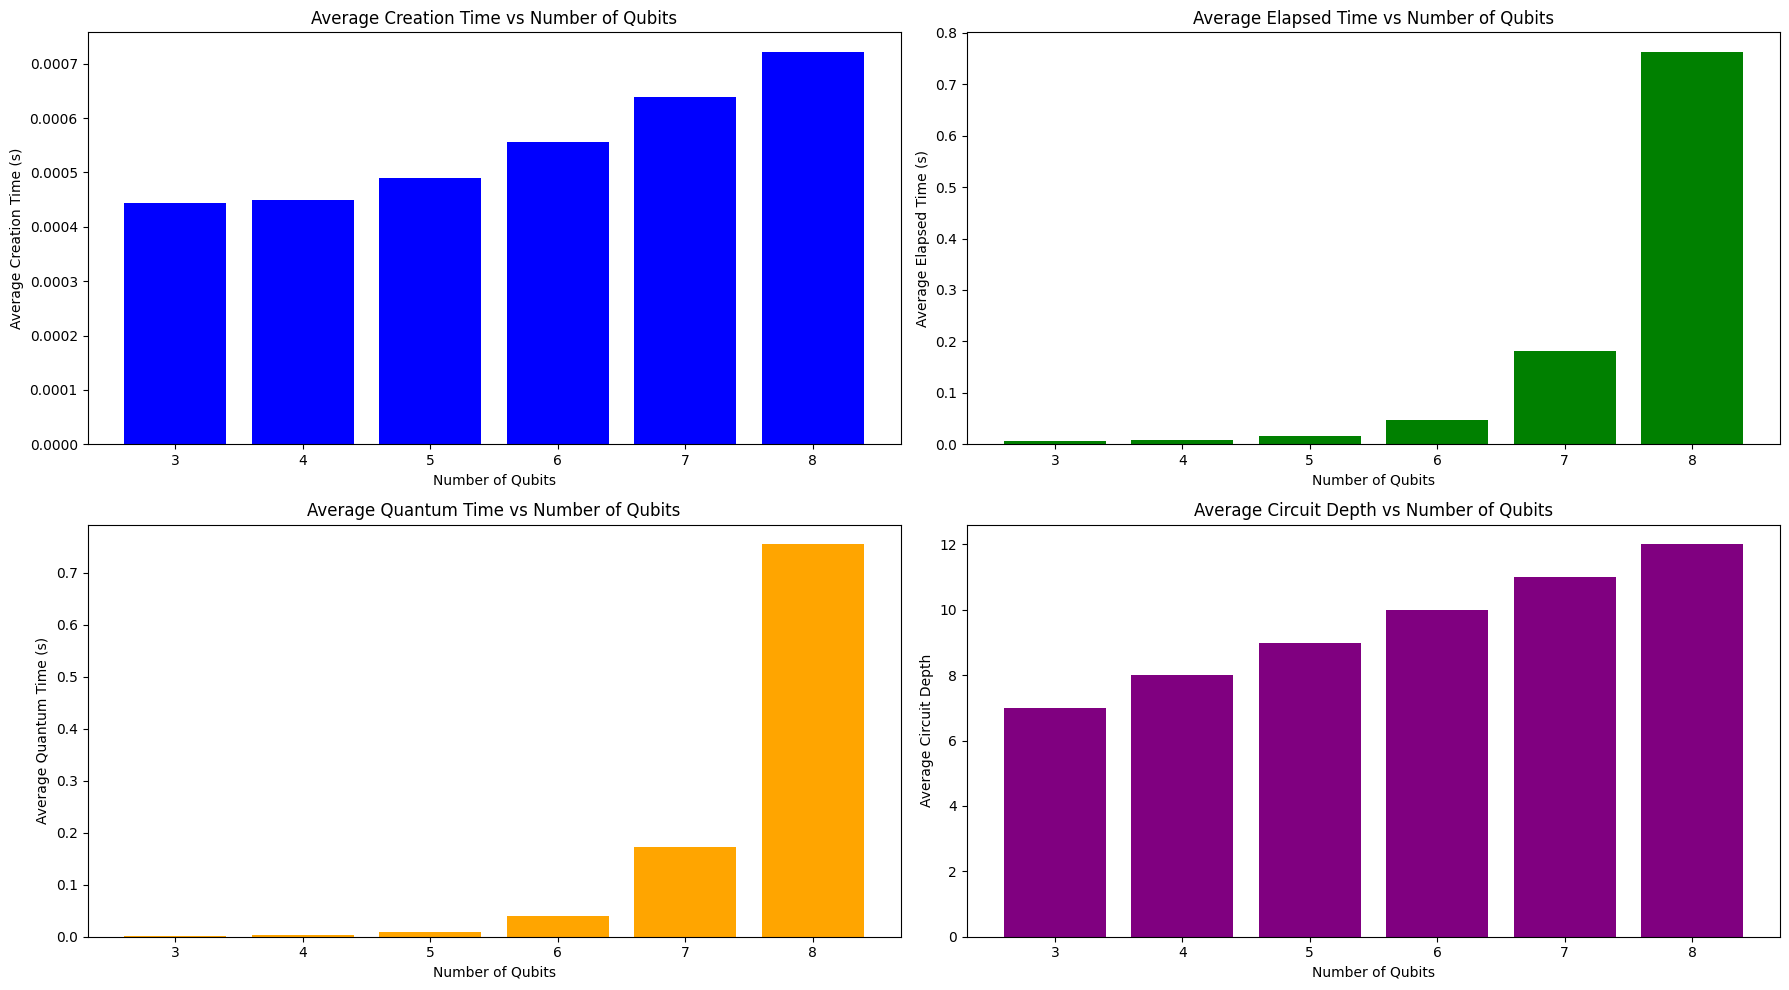

In [9]:
# Function to calculate circuit depth
def calculate_circuit_depth(qc):
    # Calculate the depth of the circuit
    depth = qc.depth()
    return depth

# Function to execute the benchmark program, accumulate metrics, and calculate circuit depths
def run_and_accumulate_metrics_with_depth(min_qubits=3, max_qubits=8, skip_qubits=1, max_circuits=3, num_shots=1024, backend=BasicAer.get_backend('dm_simulator'), Noise=1):
    creation_times = []
    elapsed_times = []
    quantum_times = []
    circuit_depths = []
    
    # Execute Benchmark Program N times for multiple circuit sizes
    for num_qubits in range(min_qubits, max_qubits + 1, skip_qubits):
        num_circuits = min(2, max_circuits)
        for type in range(num_circuits):
            ts = time.time()
            qc = DeutschJozsa(num_qubits, type)
            creation_time = time.time() - ts
            creation_times.append(creation_time)
            
            ts = time.time()
            if Noise is None:
                job = execute(qc, backend, shots=num_shots, **options)
            else:
                job = execute(qc, backend, shots=num_shots, **options_noisy)
            result = job.result()
            elapsed_time = time.time() - ts
            elapsed_times.append(elapsed_time)
            
            # Calculate quantum processing time (excluding creation time)
            quantum_time = result.results[0].running_time_taken
            quantum_times.append(quantum_time)
            
            # Calculate circuit depth
            depth = calculate_circuit_depth(qc)
            circuit_depths.append(depth)
    
    return creation_times, elapsed_times, quantum_times, circuit_depths

# Execute the benchmark program, accumulate metrics, and calculate circuit depths
creation_times, elapsed_times, quantum_times, circuit_depths = run_and_accumulate_metrics_with_depth()

# Calculate average creation time, elapsed time, quantum processing time, and circuit depth for each number of qubits
avg_creation_times = [np.mean(creation_times[i:i+2]) for i in range(0, len(creation_times), 2)]
avg_elapsed_times = [np.mean(elapsed_times[i:i+2]) for i in range(0, len(elapsed_times), 2)]
avg_quantum_times = [np.mean(quantum_times[i:i+2]) for i in range(0, len(quantum_times), 2)]
avg_circuit_depths = [np.mean(circuit_depths[i:i+2]) for i in range(0, len(circuit_depths), 2)]

# Define the range of qubits for the x-axis
num_qubits_range = range(3, 9)

# Plot histograms for average creation time, average elapsed time, average quantum processing time, and average circuit depth versus the number of qubits
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
plt.bar(num_qubits_range, avg_creation_times, color='blue')
plt.xlabel('Number of Qubits')
plt.ylabel('Average Creation Time (s)')
plt.title('Average Creation Time vs Number of Qubits')

plt.subplot(2, 2, 2)
plt.bar(num_qubits_range, avg_elapsed_times, color='green')
plt.xlabel('Number of Qubits')
plt.ylabel('Average Elapsed Time (s)')
plt.title('Average Elapsed Time vs Number of Qubits')

plt.subplot(2, 2, 3)
plt.bar(num_qubits_range, avg_quantum_times, color='orange')
plt.xlabel('Number of Qubits')
plt.ylabel('Average Quantum Time (s)')
plt.title('Average Quantum Time vs Number of Qubits')

plt.subplot(2, 2, 4)
plt.bar(num_qubits_range, avg_circuit_depths, color='purple')
plt.xlabel('Number of Qubits')
plt.ylabel('Average Circuit Depth')
plt.title('Average Circuit Depth vs Number of Qubits')

plt.tight_layout()
plt.show()
# if main, execute method
if __name__ == '__main__': run_and_accumulate_metrics_with_depth #run()